In [2]:
library(readr)
library(dplyr)
library(ggplot2)
library(stringr)
library(ggseqlogo)
library (plyr)
library(gridExtra)
library(patchwork)

In [7]:
filenames_sense_moj <- c(
    "/home/anna/Documents/new_good_tables/NT_BIAS/y1_moj_sense.tsv",
"/home/anna/Documents/new_good_tables/NT_BIAS/y2_moj_sense.tsv"
)

filenames_antisense_moj <- c(
    "/home/anna/Documents/new_good_tables/NT_BIAS/y1_moj_antisense.tsv",
"/home/anna/Documents/new_good_tables/NT_BIAS/y2_moj_antisense.tsv"
)

filenames_sense_ari <- c("/home/anna/Documents/new_good_tables/NT_BIAS/y2_ari_sense.tsv")

filenames_antisense_ari <- c("/home/anna/Documents/new_good_tables/NT_BIAS/y2_ari_antisense.tsv")

In [8]:
tables_sense_moj <- lapply(filenames_sense_moj, function(x){
    tab <- read_tsv(x, col_names = c("id","sequence")) %>% suppressMessages()
    samplename <- str_extract(x, "(y1_moj|y2_moj)")
    tab  <- tab %>% mutate(sample=samplename)
    tab <- tab %>% mutate(sequence=substr(sequence, 1, 20))
    tab
})

tables_antisense_moj <- lapply(filenames_antisense_moj, function(x){
    tab <- read_tsv(x, col_names = c("id","sequence")) %>% suppressMessages()
    samplename <- str_extract(x, "(y1_moj|y2_moj)")
    tab  <- tab %>% mutate(sample=samplename)
    tab <- tab %>% mutate(sequence=substr(sequence, 1, 20))
    tab
})

tables_sense_ari <- lapply(filenames_sense_ari, function(x){
    tab <- read_tsv(x, col_names = c("id","sequence")) %>% suppressMessages()
    samplename <- str_extract(x, "(y2_ari)")
    tab  <- tab %>% mutate(sample=samplename)
    tab <- tab %>% mutate(sequence=substr(sequence, 1, 20))
    tab
})

tables_antisense_ari <- lapply(filenames_antisense_ari, function(x){
    tab <- read_tsv(x, col_names = c("id","sequence")) %>% suppressMessages()
    samplename <- str_extract(x, "(y2_ari)")
    tab  <- tab %>% mutate(sample=samplename)
    tab <- tab %>% mutate(sequence=substr(sequence, 1, 20))
    tab
})

table_sense_moj <- ldply (tables_sense_moj, data.frame)
table_antisense_moj <- ldply (tables_antisense_moj, data.frame)
table_sense_ari <- ldply (tables_sense_ari, data.frame)
table_antisense_ari <- ldply (tables_antisense_ari, data.frame)

table_sense_moj$sequence <- gsub('T','U', table_sense_moj$sequence)
table_antisense_moj$sequence <- gsub('T','U', table_antisense_moj$sequence)
table_sense_ari$sequence <- gsub('T','U', table_sense_ari$sequence)
table_antisense_ari$sequence <- gsub('T','U', table_antisense_ari$sequence)

df_moj_sense <- as.vector(table_sense_moj$sequence)
df_moj_antisense <- as.vector(table_antisense_moj$sequence)
df_ari_sense <- as.vector(table_sense_ari$sequence)
df_ari_antisense <- as.vector(table_antisense_ari$sequence)


In [9]:
require(ggplot2)
require(ggseqlogo)




p1 = ggseqlogo(df_moj_antisense, method = 'bits', col_scheme='nucleotide', seq_type='rna' ) + ggtitle("D. mojavensis - antisenso")
p2 = ggseqlogo(df_ari_antisense, method = 'bits', col_scheme='nucleotide', seq_type='rna' ) + ggtitle("D. arizonae - antisenso")
p3 = ggseqlogo(df_moj_sense, method = 'bits', col_scheme='nucleotide', seq_type='rna' ) + ggtitle("D. mojavensis - senso")
p4 = ggseqlogo(df_ari_sense, method = 'bits', col_scheme='nucleotide', seq_type='rna' ) + ggtitle("D. arizonae - senso")


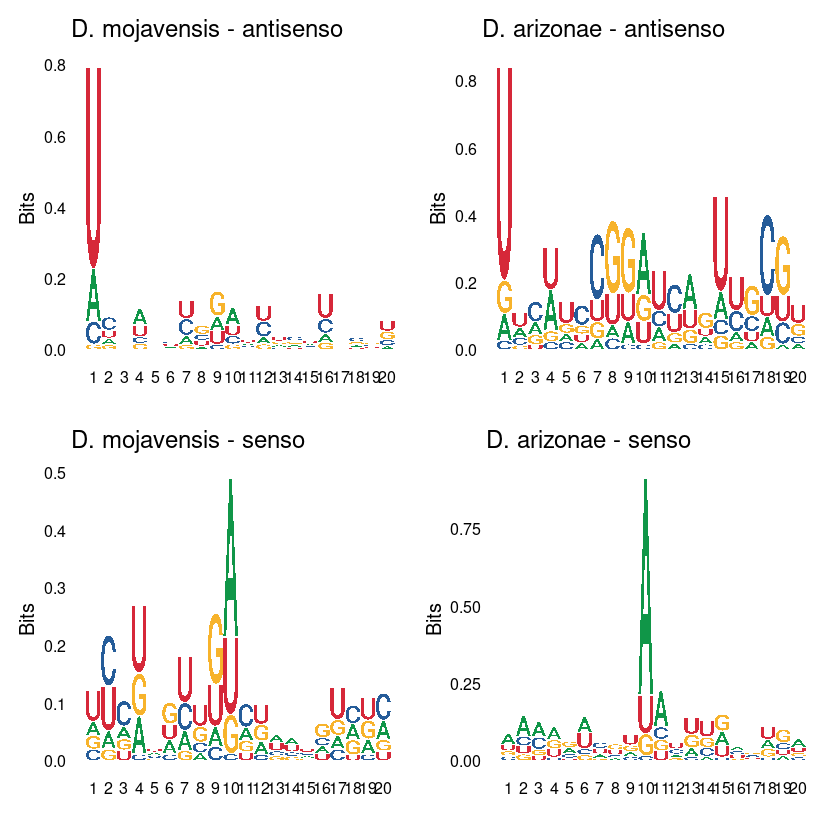

In [11]:
(p1| p2) / (p3 | p4)
ggsave(file="nucleotide_bias.png", width=8, height=4, dpi=300)